# Task 1 : Prediction using Supervised Machine Learning

## Problem Statement


In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task involving  just two variables.  

### Importing the required libraries


In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Importing and reading the dataset using pandas commands

In [6]:
url = r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
print("Data import successful")

df.head(10)

Data import successful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


When the correlation coefficient  is close to 1, it means that there is a strong positive correlation; For example, the 'Scores' value tends to go up when the 'Hours' income goes up.

### Visualizing the data to get insights

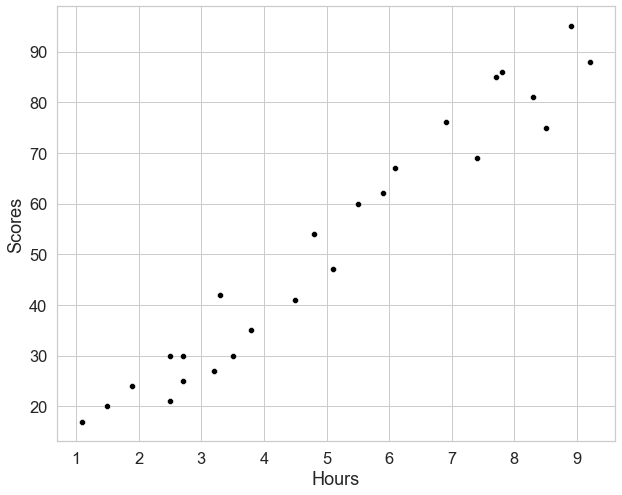

In [20]:
sns.set(style='whitegrid', font_scale=1.5, rc={"figure.figsize": [10, 8]})
sns.scatterplot(data=df,x=df.Hours,y=df.Scores,color='black')
plt.show()

The above plot reveals that, the correlation is indeed very strong; we can clearly see the upward trend, and the points are not too dispersed.

Therfore we can safely assume a positive linear relation between the number of hours studied and percentage of score

### Data Preparation for Model building

This step involves division of data into "attributes" (inputs) and "labels" (outputs).

In [21]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

### Data set splitting

This step involves Splitting the data into training and testing sets.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 


### Model Building

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("Training complete.")

Training complete.


### Plotting the Linear regression line

Now since our model is trained now, its the time to visualize the best-fit line of regression.

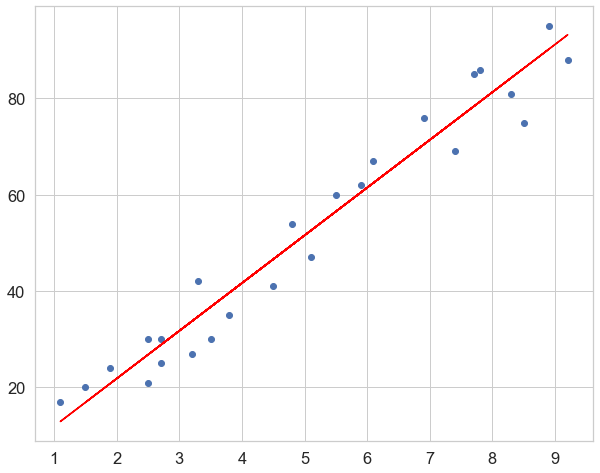

In [30]:
# Plotting the regression line
line = lin_reg.coef_*X+lin_reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

### Making Predictions

Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will be using our test-set data

In [31]:

# Model Prediction 
y_pred = lin_reg.predict(X_test)

### Comparing Actual result to the Predicted Model's results

In [32]:
# Comparing Actual vs Predicted
DF = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
DF

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [33]:
#Estimating training and test score
print("Training Score:",lin_reg.score(X_train,y_train))
print("Test Score:",lin_reg.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


We can clearly see the model overfitting our data.I will overcome this by trying to regularise it later

### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [35]:

from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


### Regualarising our model to prevent overfitting(Using lasso regression)

In [48]:
from sklearn.linear_model import Lasso

In [61]:
lasso=Lasso(alpha=0.9)

In [62]:
lasso_reg=lasso.fit(X_train, y_train)
print("Training complete.")

Training complete.


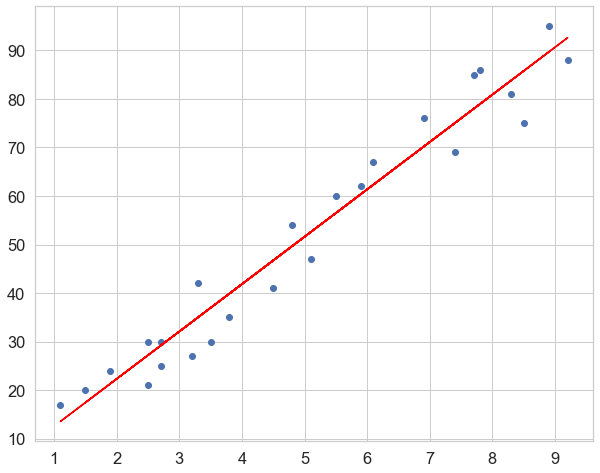

In [63]:
# Plotting the lasso regression line
line2 = lasso_reg.coef_*X+lasso_reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line2,color='red');
plt.show()

Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will be using our test-set data

In [64]:
y_pred_lasso = lasso_reg.predict(X_test)

In [65]:
# Comparing Actual vs Predicted
DF = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso}) 
DF

,Actual,Predicted
0,20,17.428946
1,27,34.029425
2,69,75.042373
3,30,27.193934
4,62,60.394892


In [66]:
#Estimating training and test score
print("Training Score:",lasso_reg.score(X_train,y_train))
print("Test Score:",lasso_reg.score(X_test,y_test))

Training Score: 0.9513455022862184
Test Score: 0.9480194868826209


Still we werent able to prevent overfitting this maybe due to lesser data available and can be overcome by getting some more data .

In [67]:

from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred_lasso)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('R-2:', metrics.r2_score(y_test, y_pred_lasso))

Mean Absolute Error: 4.010805386507833
Mean Squared Error: 20.59675851763028
Root Mean Squared Error: 4.538365181167144
R-2: 0.9480194868826209


But we can clearly see that we have considerably decreased all the error terms and yeah so this is kind of improvement to unregularised model.

In [70]:
                                               #Evaluating the model
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = lasso_reg.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.10760067331347


## Conclusion




I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters and also regualrised the model to get better predictions.

## Thank You